In [1]:
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as metrics

# Get Data
---

In [2]:
wines = datasets.load_wine()

In [3]:
x = pd.DataFrame(wines.data, columns=wines.feature_names)
y = pd.DataFrame(wines.target, columns=['Target'])

In [4]:
y_classes = wines.target

Text(0, 0.5, 'Color intensity')

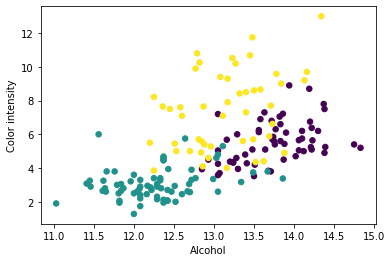

In [6]:
plt.scatter(x['alcohol'], x['color_intensity'], c = y_classes, s=30)
plt.xlabel('Alcohol', fontsize=10)
plt.ylabel('Color intensity', fontsize=10)

# Preprocess data
---

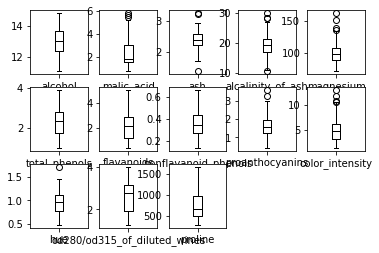

In [7]:
x.plot( kind = 'box', subplots = True, layout = (3,5), sharex = False, sharey = False, color='black')
plt.show()

In [8]:
# Data normalization
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)

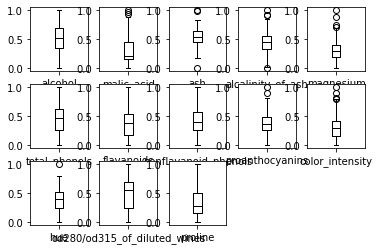

In [9]:
pd.DataFrame(x_norm, columns=wines.feature_names).plot( kind = 'box', subplots = True, layout = (3,5), sharex = False, sharey = False, color='black')
plt.show()

In [10]:
#Data standardization
std_scaler = StandardScaler()
data_scaled = x_norm.copy()
data_scaled = pd.DataFrame(data_scaled, columns=wines.feature_names)

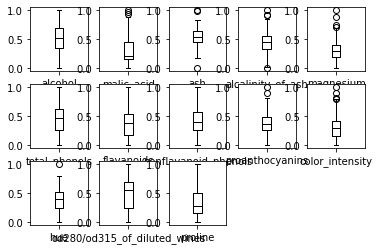

In [11]:
data_scaled.plot( kind = 'box', subplots = True, layout = (3,5), sharex = False, sharey = False, color='black')
plt.show()

# Build model and calculate accuracy
---

In [12]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
y_kmeans=model.predict(data_scaled)
print("Predictions: ", y_kmeans)

Predictions:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 0 0 0 1 0 1 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
accuracy = metrics.adjusted_rand_score(y_classes, y_kmeans)
accuracy

0.8685425493202144